In [1]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
concrete = np.genfromtxt("../data/concrete.csv", delimiter=" ,")

In [4]:
concrete = data.Data(concrete[:, :-1], concrete[:,-1],              
                     target_names = ["Cement", "Slag", "Fly Ash", "Water", "Superplasticiser", "Coarse Agg", "Fine Ag", "Age"],
                      label_names = ["Strength"]   )

In [5]:
from heron import corner

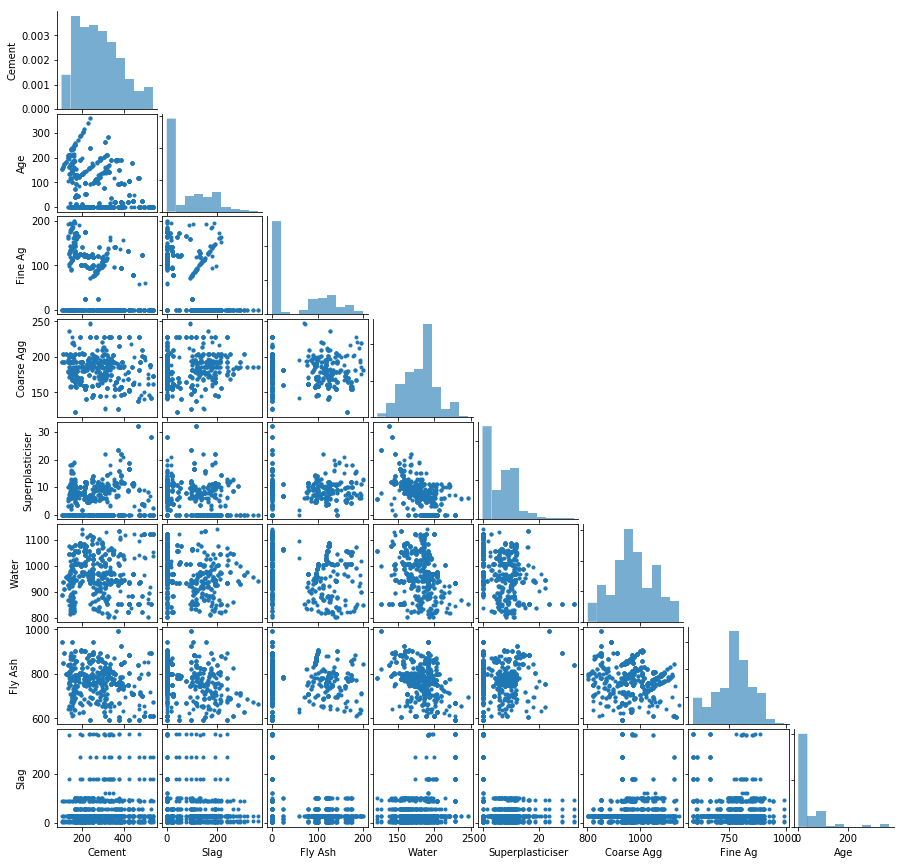

In [6]:
corner.corner(concrete, figsize=(15,15))

In [7]:
from heron import regression
from heron import kernels

In [9]:
gp = regression.Regressor(concrete, kernel=kernels.SquaredExponential(ndim=8))

In [10]:
new_point = np.atleast_2d([0.1]*8)

In [11]:
new_point = np.atleast_2d(gp.training_data[1])
new_point[0,1]+=0.1

In [12]:
gp.prediction(new_point)

(array([ 22.50255699]), array([[-5915.86957992]]))

In [13]:
concrete.labels

array([ 0.96748474,  0.74199576,  0.47265479, ...,  0.26622649,
        0.37922013,  0.37461069])

In [14]:
new_point = np.tile(new_point, (100,1))

In [15]:
new_point[:,1] = np.linspace(0,1,100)

In [16]:
pred = gp.prediction(new_point)

AttributeError: 'module' object has no attribute 'y'

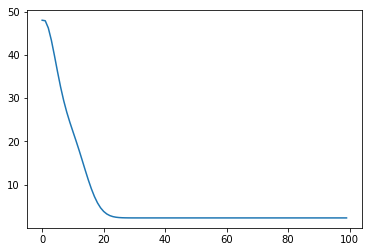

In [17]:
plt.plot(pred[0])
plt.y

In [24]:
gp.set_hyperparameters([5]*9)
gp.loglikelihood()

-89941.002666408676

In [29]:
import emcee

In [30]:
ndim = 9
burn = 10
nwalkers = 100
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [32]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, gp.set_hyperparameters, args=[])
# Run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burn)

In [18]:
def nll(p):
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_hyperparameters(p)
    return -gp.grad_lnlikelihood(y, quiet=True)

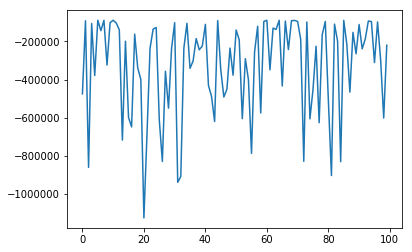

In [37]:
plt.plot(prob)

In [38]:
gp.loglikelihood()

-219719.59704498551

In [39]:
pos[-1]

array([ 0.49244046,  2.73157503,  0.58098634,  0.52088189, -3.03855323,
        2.96034444,  1.05788286, -0.11021227,  2.89234684])

In [40]:
np.exp(0)

1.0